In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
def avg_outlier(x, n_outliers):

    x1  = np.array(x)
    for i in range(n_outliers):
        avg     = np.mean( x1 )
        i_extremum = np.argmax(np.abs(x1-avg))
        if np.abs(x1[i_extremum] - avg)<0.001:
            break
        x1 = x1[ np.arange(len(x1)) != i_extremum ]
    avg = np.mean(x1)
    std = np.std(x1)
    lim = 3*std
    x2 = x[ np.abs( x-avg )<=lim ]
    avg_step_size = np.mean(x2)

    return avg_step_size

In [3]:
N = 100000
M = 10

averages={0:[], 1:[], 4:[], 7:[]}
for i in range(N):

    r = np.random.normal(size=M)

    averages[0].append(np.mean(r))
    averages[1].append(avg_outlier(r, 1))
    averages[4].append(avg_outlier(r, 4))
    averages[7].append(avg_outlier(r, 7))
    


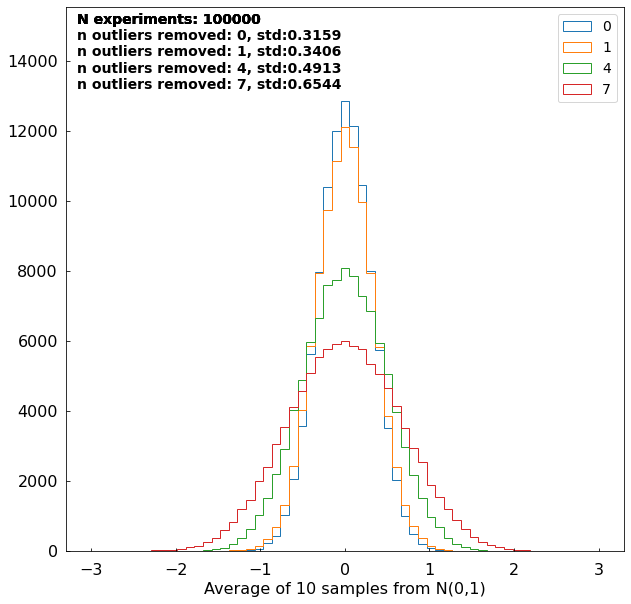

In [5]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(111)
ax0.set_xlabel("Average of 10 samples from N(0,1)", fontsize=16)
ax0.tick_params(axis='y', which='major', direction="in", labelsize=16, pad = 8)
ax0.tick_params(axis='x', which='major', direction="in", labelsize=16, pad = 12)
for ik, k in enumerate(sorted(averages.keys())):
    ax0.hist(averages[k], bins=np.linspace(-3,3,60), density=False, histtype='step', align='mid', label=str(k))
    ax0.text(0.02, 1-0.01, "N experiments: {}".format(N),
                        horizontalalignment='left',
                        verticalalignment='top',
                        transform=ax0.transAxes,
                        fontname='sans-serif',
                        fontweight='bold',
                        fontsize=14)
    ax0.text(0.02, 1-0.04-ik*0.03, "n outliers removed: {}, std:{:0.4f}".format(k, np.std(averages[k])),
                        horizontalalignment='left',
                        verticalalignment='top',
                        transform=ax0.transAxes,
                        fontname='sans-serif',
                        fontweight='bold',
                        fontsize=14)

ax0.set_ylim(0, ax0.get_ylim()[1]*1.15)
ax0.legend(fontsize=14)